$$\sigma(x)=\frac{1}{1+e^{-x}}$$

$$s\left(\overset{\rightarrow}{z}\right)_{i}=\frac{e^{z_{i}}}{\sum_{j}^{K}{e^{z_{j}}}}$$

$$f(x)=\text{ln}(1+e^{x})$$

$$f(\theta)=\sum_{k=1}^{\infty}{\beta_{k}\cdot\delta_{\theta_{k}}(\theta)}$$

$$\underset{w}{\text{argmin}}\  \mathcal{L}(f(w),y) + \lambda \lVert w\rVert^{2}_{2}$$

# SGD

In [1]:
import torch

# start at minimum
θ = torch.tensor([2.001, 3.001], requires_grad=True)
optimizer = torch.optim.SGD([θ], lr=.05)

def f(θ):
    x, y = θ
    r1 = torch.sqrt(x**2 + y**2)
    r2 = torch.sqrt((x-2)**2 + (y-3)**2)
    return (
        torch.exp(-torch.sqrt(r1**2)/2)*torch.sin(r1)
        - torch.exp(-torch.sqrt(r2**2)/2)*torch.cos(r2)
    )

print(θ)
θ_star = []
for _ in range(100):
    # gradient ascent
    loss = -f(θ)
    loss.retain_grad()
    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    θ_star.append(tuple([*θ.detach().numpy(), float(f(θ).detach().numpy())]))

tensor([2.0010, 3.0010], requires_grad=True)


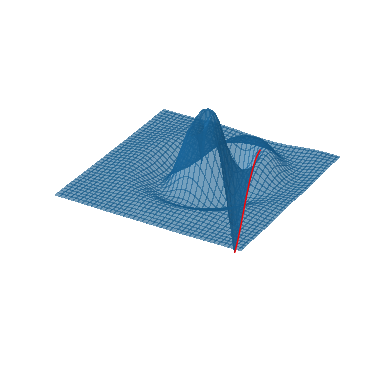

In [8]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R1 = np.sqrt(X**2 + Y**2)
R2 = np.sqrt((X-2)**2 + (Y-3)**2)
Z = f(torch.tensor(np.stack([X, Y])))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       antialiased=False,
                       alpha=.6)
ax.plot(*np.array(θ_star).T, ls='-', lw=1, color='r', zorder=10)

ax.view_init(elev=30)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.grid(False)

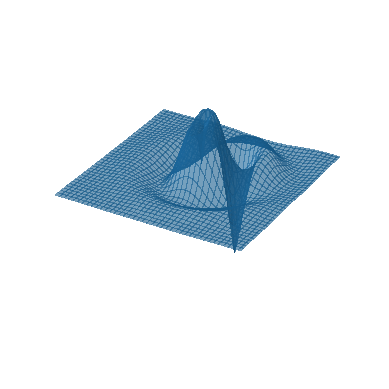

In [11]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import PIL

import matplotlib.animation as animation


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


def update_lines(num, path, surf):
    # NOTE: there is no .set_data() for 3 dim data...
    surf[0].set_data(path[:num, :2].T)
    surf[0].set_3d_properties(path[:num, 2])
    return surf


# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R1 = np.sqrt(X**2 + Y**2)
R2 = np.sqrt((X-2)**2 + (Y-3)**2)
Z = f(torch.tensor(np.stack([X, Y])))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       antialiased=False,
                       alpha=.6)
lines = ax.plot([], [], [], ls='-', lw=1, color='r', zorder=10)

# Creating the Animation object
path = np.array(θ_star[::-1])
ani = animation.FuncAnimation(
    fig, update_lines, len(θ_star), fargs=(path, lines), interval=100)


ax.view_init(elev=30)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.axis('off')

animation = ani.to_jshtml()

In [12]:
HTML(animation)

In [13]:
ani.save('sgd.mp4')

# CLV DAG

/Users/dantegates/virtualenvs/default/lib/python3.9/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


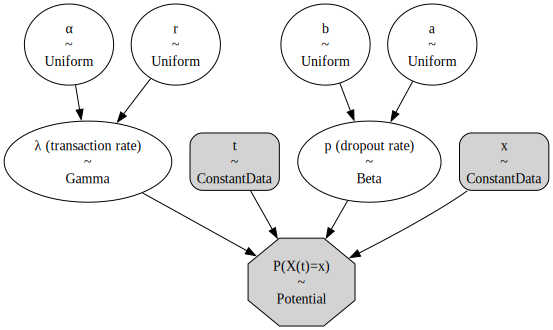

In [21]:
import pymc as pm

with pm.Model() as model:
    x = pm.Data('x', 0)
    t = pm.Data('t', 0)
    
    # rate
    r = pm.Uniform('r', 0, 1000)
    α = pm.Uniform('α', 0, 1000)
    λ = pm.Gamma('λ (transaction rate)', r, α)

    # dropout
    a = pm.Uniform('a', 0, 1000)
    b = pm.Uniform('b', 0, 1000)
    p = pm.Beta('p (dropout rate)', a, b)

    # likelihood
    likelihood = pm.Potential('P(X(t)=x)', λ * p * x * t)

pm.model_to_graphviz(model)

# Cryptogram

In [38]:
import string
import textwrap

import numpy as np
from IPython.display import HTML

cipher = {a: b for a, b in zip(string.ascii_uppercase, sorted(string.ascii_uppercase, key=lambda x: np.random.rand()))}

c = ('''
The great ships hung motionless in the air,...
a blasphemy against nature...
The ships hung in the sky in much the same way that bricks don't.
''').upper()


encryption = c.translate(str.maketrans(cipher))

out = []
for L1, L2 in zip(c.strip().split('\n'), encryption.strip().split('\n')):
    out.append(f'''
        <span style="color: grey"><tt>{L1}</tt></span>
        <br>
        <span><tt><strong>{L2}</strong></tt></span>
        <br><br>
    ''')

display(HTML('\n'.join(out)))

In [39]:
print('\n'.join(out))


        <span style="color: grey"><tt>THE GREAT SHIPS HUNG MOTIONLESS IN THE AIR,...</tt></span>
        <br>
        <span><tt><strong>LUK JRKZL YUSGY UQNJ TBLSBNEKYY SN LUK ZSR,...</strong></tt></span>
        <br><br>
    

        <span style="color: grey"><tt>A BLASPHEMY AGAINST NATURE...</tt></span>
        <br>
        <span><tt><strong>Z AEZYGUKTM ZJZSNYL NZLQRK...</strong></tt></span>
        <br><br>
    

        <span style="color: grey"><tt>THE SHIPS HUNG IN THE SKY IN MUCH THE SAME WAY THAT BRICKS DON'T.</tt></span>
        <br>
        <span><tt><strong>LUK YUSGY UQNJ SN LUK YDM SN TQHU LUK YZTK CZM LUZL ARSHDY FBN'L.</strong></tt></span>
        <br><br>
    


In [45]:
out = []
for a, b in cipher.items():
    out.append(fr'${a}\rightarraw {b}$')
print('\n'.join(out))

$A\rightarraw Z$
$B\rightarraw A$
$C\rightarraw H$
$D\rightarraw F$
$E\rightarraw K$
$F\rightarraw W$
$G\rightarraw J$
$H\rightarraw U$
$I\rightarraw S$
$J\rightarraw X$
$K\rightarraw D$
$L\rightarraw E$
$M\rightarraw T$
$N\rightarraw N$
$O\rightarraw B$
$P\rightarraw G$
$Q\rightarraw I$
$R\rightarraw R$
$S\rightarraw Y$
$T\rightarraw L$
$U\rightarraw Q$
$V\rightarraw V$
$W\rightarraw C$
$X\rightarraw P$
$Y\rightarraw M$
$Z\rightarraw O$
